In [14]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = [16, 12]

import math
import numpy as np

from interaction import Interaction
from environment import Environment
from fish import Fish
from channel import Channel
from observer import Observer

from utils import generate_distortion, generate_fish, run_simulation

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Please wait patiently 10 seconds. Thanks.
[ 0.  0.  0.]
[ 0.  0.  0.]
[ 0.  0.  0.][ 0.  0.  0.][ 0.  0.  0.][ 0.  0.  0.][ 0.  0.  0.][ 0.  0.  0.][ 0.  0.  0.]






[-93.02642143 -90.80742771   0.30982275][  -3.02174224 -100.            0.43795859][   0.81709954 -129.99670851    0.43373305]


[-92.05902581  91.78801241   0.310716  ][ 91.92309958  91.92413683   0.3111768 ][  41.87958474   41.92779608 -115.707218  ]

[ 129.99748136    0.67834598    0.4412335 ]
[   0.          129.99924335    0.44353996]

[-90.90767688 -92.92846479   0.30775999]
[-44.60928763  -9.           0.13520201]
[  44.61664337  122.10379698    0.13378152]
[ -22.4207311   127.00795039   16.318436  ]
[  41.75358672   45.82666189 -114.26528369][  20.125623   -127.62734421   14.36037284]
[  61.43737399  114.41376917   -5.91087987][-98.44162092 -83.27476536  16.56987404][ 104.91511382  -74.39449247   18.92824298]



[ 128.61497751   14.63539126   11.99970343]
[ 64.79849614   0.          -1.6806998 ][  -1.78195458 -12

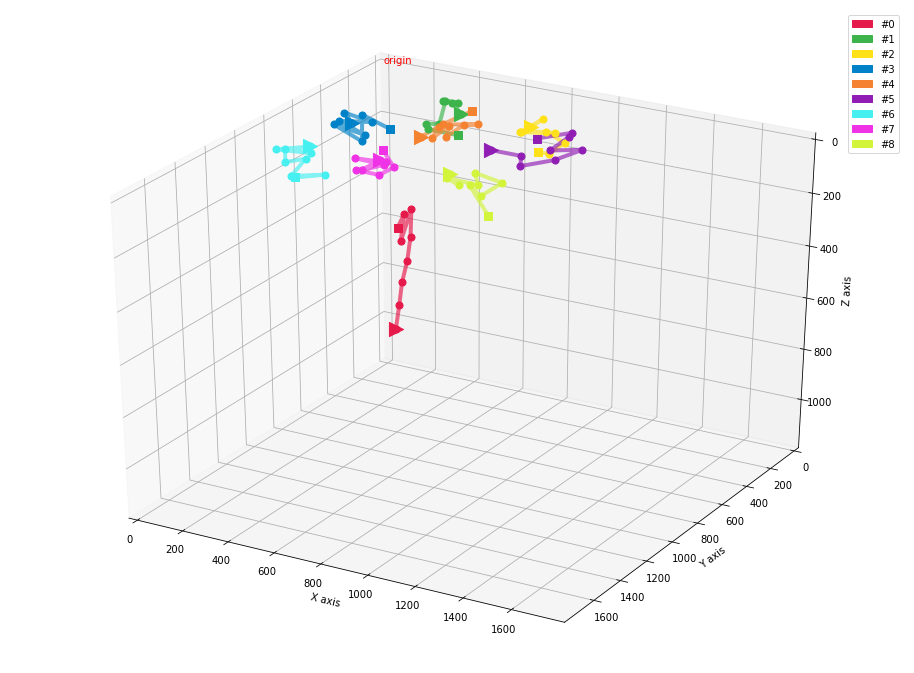

In [15]:
#from events import Move

run_time = 10 # in seconds
num_fish = 9
arena_size = np.array([1780, 1780, 1170])
arena_center = arena_size / 2.0
initial_spread = 500
#fish_pos = initial_spread * np.random.rand(num_fish, 3) + arena_center - initial_spread / 2.0
fish_pos = np.array([[100, 100, 100], [400, 100, 100], [700, 100, 100], [100, 400, 100], [400, 400, 100], [700, 400, 100], [100, 700, 100], [400, 700, 100], [700, 700, 100]])
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='none', magnitude=1, n=math.ceil(arena_size[0]/10), show=False)
environment = Environment(
    arena_size=arena_size,
    node_pos=fish_pos,
    distortion=distortion,
    prob_type='binary',
    conn_thres=2500,
    conn_drop=1,
    noise_magnitude=0,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

fish = generate_fish(
    n=num_fish, 
    channel=channel, 
    interaction=interaction,
    target_dist=390,
    lim_neighbors=[2,3],
    neighbor_weights=1.0,
    fish_max_speeds=130,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)
observer = Observer(fish=fish, environment=environment, channel=channel)

#migrate = Move(0, 0, 0)
#observer.instruct(event=migrate, rel_clock=0, fish_all=True)

run_simulation(fish=fish, observer=observer, run_time=run_time, dark=False, white_axis=False, no_legend=False)

Please wait patiently 20 seconds. Thanks.
0.001 0.001 0.0010.0010.0010.0010.0010.0010.0010.0010.0010.0010.0010.0010.001    0.0010.0010.0010.0010.0010.0010.0010.0010.0010.001                                                                                 625.618435137                                        222.833251377             
          
493.910056962432.342282199422.980442154429.431255273222.8332513770.001227.622424104419.53146643418.47881995754.171443036411.233627427284.723758403429.431255273837.57842938162.585340534656.002309475418.869587319676.477622153331.768397841676.477622153418.47881995793.233763996422.980442154






















80.3161510108128.493071037129.985843462125.474133251111.961844924121.116678696127.8107678070.53166885819477.0416857094107.06408770877.68778922940.53166939304127.510345722129.956696944104.3931180082.5057798667593.6857243841113.08678618187.0456039978129.694563226129.963948659127.316263136114.37986276792.2906005607114.089609613                   

106.846787493      315.653442737
110.05096160129.578986528  127.63046501294.042928629791.666436117152.1185328245127.963429978107.1177624683.2285618815125.913585743126.44395573880.129969444548.4918310855112.530277682128.709233005117.198754104113.801182109111.124582441118.73364166587.8408543145114.83564989884.3663971108129.966352189117.607147389                                                                                                                        302.314502996360.420234796                      

464.501470769215.41809184257.748559051213.836664705227.467434303263.050236647233.842974584421.797209736322.64160092316.145885964344.55529294227.467434303237.083896703464.58383373373.053996205360.439666724293.861186067315.700268775364.34146774293.861186067188.698414683414.534338622110.050961601





















 87.8408543145127.63046501294.0429286297117.198754104112.530277682125.913585743                                   174.347758296      
403.022997731585.401969482115.37115

95.6599366388      303.565276312
62.8210560479109.900033978126.321074475  96.8027762804 128.58093631191.2430190095125.363154928109.891882684.9458232010524.0687220496129.912088026129.064392942119.831734989129.80714141885.4240065776126.1132787123.607139909129.915021517106.87269880965.119014417824.9426515105121.319481198120.24723986124.22465634                                                                                                                        334.349787624335.395552039 249.856176738                    

355.266479773
391.351715589332.206063843355.266479773333.216222554323.065908002218.43492802359.095455914505.583238415251.240860392344.000764806257.926235254240.597620343360.378284884268.565875008407.777298101318.699679445384.415158436433.555656327465.686676918355.276849964109.900033978126.321074475




















  96.8027762804120.2472398665.119014417891.243019009585.4240065776119.831734989129.91208802624.0687220496                                                  

121.557305572129.193766564 108.744030702 90.7319268056126.350581936106.87070342779.302536161125.910560009              35.1373495615121.145664254129.797512925129.05421061348.6357550088                               75.6192246685.0635385182129.76917800782.260036878582.7290913019121.219259409118.680955427126.33676048792.625170698667.354392083448.4210433577116.793113613279.118012494 352.303077843                                     
87.3710052959
416.26960267304.075747444338.170922549170.161151774283.407373009                                                     121.557305572
 




79.2527985761339.920191189195.000768197359.875885292306.488121932            108.744030702323.183217602280.002678701343.124332966392.46934077192.6561513203359.721109546




347.062687177321.298454227432.708975553205.680843166206.093108735361.57535591     





35.1373495615121.145664254





     116.79311361385.063538518267.354392083492.6251706986126.33676048775.61922466  82.260036878582.7290913019281.360317788

97.3932837622      318.438450799
119.068700509 56.320353571462.021278407878.9227136892101.550290275        110.825355108129.7731581399.492019103577.2707687589126.98168703582.231306809386.7808291734                        121.491959825127.701925504114.2167394895.6627944188129.872474624129.61399939790.9562913026103.53672205852.458441088689.955770958890.6288944987115.233046675279.547424507                                            
320.244297159355.97469162295.706125462198.828403676                                                        



344.590191799268.928739506420.85139507293.008115839298.786591046275.816201207285.179011639           122.07325602256.320353571462.0212784078225.652790248371.007560108






275.816201207329.384295269104.834481434411.187217297211.038726045285.968531589415.191485575277.588919095254.865876514
  


129.77315813


82.2313068093




95.6627944188        90.628894498789.9557709588114.21673948 127.701925504129.872474624129.613999397                      388.2

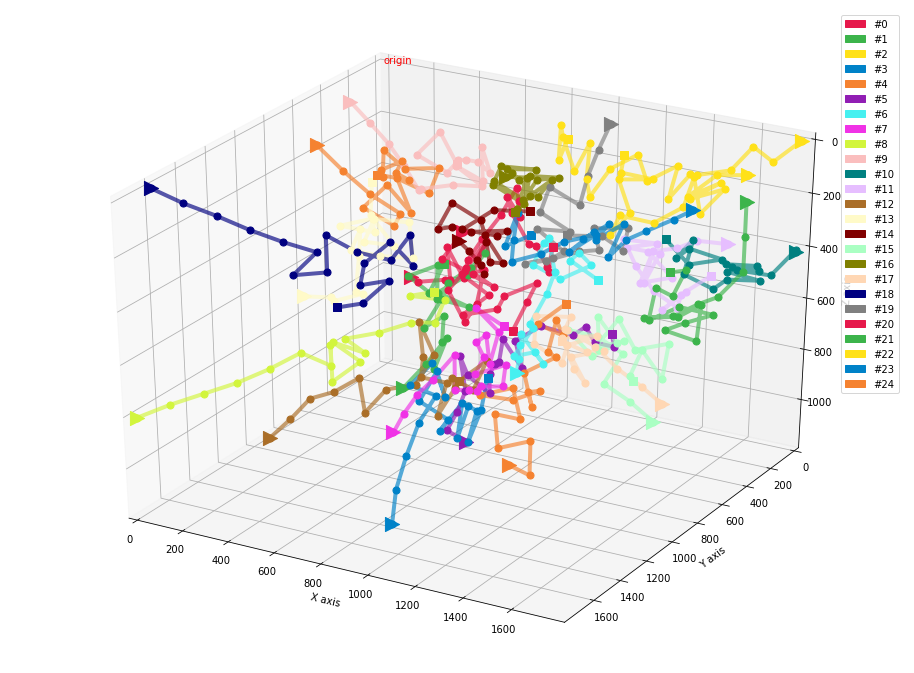

In [19]:
run_time = 20 # in seconds
num_fish = 25
arena_size = np.array([1780, 1780, 1170])
arena_center = arena_size / 2.0
initial_spread = 2500
fish_pos = initial_spread * np.random.rand(num_fish, 3) + arena_center - initial_spread / 2.0
clock_freqs = 1
verbose = False

distortion = generate_distortion(type='none', magnitude=1, n=math.ceil(arena_size[0]/10), show=False)
environment = Environment(
    arena_size=arena_size,
    node_pos=fish_pos,
    distortion=distortion,
    prob_type='binary',
    conn_thres=2500,
    conn_drop=1,
    noise_magnitude=0,
    verbose=verbose
)
interaction = Interaction(environment, verbose=verbose)
channel = Channel(environment)

fish = generate_fish(
    n=num_fish, 
    channel=channel, 
    interaction=interaction,
    target_dist=390,
    lim_neighbors=[2,3],
    neighbor_weights=1.0,
    fish_max_speeds=130,
    clock_freqs=clock_freqs,
    verbose=verbose
)
channel.set_nodes(fish)

observer = Observer(fish=fish, environment=environment, channel=channel)
run_simulation(fish=fish, observer=observer, run_time=run_time, dark=False, white_axis=False, no_legend=False)